# Combinando classificadores para melhoria de performace

## Importação dos dados

In [40]:
CSV_TREINO_URL = 'https://raw.githubusercontent.com/alura-cursos/combina-classificadores/main/dados/train.csv'
CSV_TESTE_URL = 'https://raw.githubusercontent.com/alura-cursos/combina-classificadores/main/dados/test.csv'
SEED = 7

In [41]:
import pandas as pd

In [42]:
df_train = pd.read_csv(CSV_TREINO_URL)

df_train.head()

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

In [43]:
df_test = pd.read_csv(CSV_TESTE_URL)

df_test.head()

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  1  ...                       4   
2                                  0  ...                       2   
3                                  0  ...                       1   
4                                  3  ...                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 5                 5                 5                2   
1                 4                 4                 4                3   
2                 4                 1                 3                2   
3                 1                 1                 1                3   
4                 2                 2                 2                4   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          50   
1                 4            5                           0   
2                 2            2                           0   
3                 1            4                           0   
4                 2            4                           0   

   Arrival Delay in Minutes             satisfaction  
0                      44.0                satisfied  
1                       0.0                satisfied  
2                       0.0  neutral or dissatisfied  
3                       6.0                satisfied  
4                      20.0                satisfied  

[5 rows x 25 columns]

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [45]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [46]:
df_train.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [47]:
df_test.isna().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [48]:
def dataset_handler(df):
    clean_dataframe = df.copy()

    clean_dataframe.drop(['Unnamed: 0', 'id'], 
                         axis=1, 
                         inplace=True)

    clean_dataframe.dropna(inplace=True)

    return pd.get_dummies(clean_dataframe,
                          columns=['Gender', 'Customer Type', 
                                   'Type of Travel', 'Class'])


In [49]:
df_train_clean = dataset_handler(df_train)
df_test_clean = dataset_handler(df_test)

In [50]:
print('Train shape: ', df_train_clean.shape)
print('Train shape: ', df_test_clean.shape)

Train shape:  (103594, 28)
Train shape:  (25893, 28)


In [51]:
X_train, y_train = df_train_clean.drop('satisfaction', axis=1), df_train_clean['satisfaction']
X_test, y_test = df_test_clean.drop('satisfaction', axis=1), df_test_clean['satisfaction']

## Aula 1 - Modelos clássicos

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

validacao_tree = cross_validate(DecisionTreeClassifier(random_state=SEED),
                           X_train, 
                           y_train, 
                           cv=5)

validacao_tree['test_score'].mean()

0.9441377092426766

In [53]:
from sklearn.metrics import accuracy_score

model_tree = DecisionTreeClassifier(random_state=SEED)

model_tree.fit(X_train, y_train)

y_hat = model_tree.predict(X_test)

accuracy_score(y_test, y_hat)

0.946858224230487

In [55]:
from sklearn.linear_model import LogisticRegression

validacao_logreg = cross_validate(LogisticRegression(random_state=SEED),
                                  X_train,
                                  y_train,
                                  cv=5)

validacao_logreg['test_score'].mean()

/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.8162634904677752

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

validacao_logreg = cross_validate(Pipeline([
                                        ('scaler', StandardScaler()),
                                        ('LogisticRegression', LogisticRegression(random_state=SEED))]),
                                  X_train,
                                  y_train,
                                  cv=5)

validacao_logreg['test_score'].mean()

0.8749541859894492

## Aula 2 - Votação

In [64]:
from sklearn.naive_bayes import GaussianNB

modelos = [(DecisionTreeClassifier, {'random_state': SEED}),
           (LogisticRegression, {'random_state': SEED}),
           (GaussianNB, None)]

pipelines = []

for Model, params in modelos:
    pipelines.append(
        Pipeline([('scaler', StandardScaler()),
                  (Model.__name__, Model(**params) if params is not None else Model())])
    )

    print(f'Validação para {Model.__name__}',
          cross_validate(pipelines[-1],
                         X_train,
                         y_train,
                         cv=5)['test_score'].mean())

Validação para DecisionTreeClassifier 0.944214935376525
Validação para LogisticRegression 0.8749541859894492
Validação para GaussianNB 0.8483406855152964


In [67]:
from sklearn.ensemble import VotingClassifier

votacao_hard = VotingClassifier(estimators=[(Model.__name__, pipeline) for (Model, _), pipeline in zip(modelos, pipelines)],
                                voting='hard')

votacao_hard

VotingClassifier(estimators=[('DecisionTreeClassifier',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('DecisionTreeClassifier',
                                               DecisionTreeClassifier(random_state=7))])),
                             ('LogisticRegression',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('LogisticRegression',
                                               LogisticRegression(random_state=7))])),
                             ('GaussianNB',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('GaussianNB', GaussianNB())]))])

In [68]:
cross_validate(votacao_hard,
               X_train, 
               y_train,
               cv=5)['test_score'].mean()

0.8916443498100606

In [69]:
votacao_soft = VotingClassifier(estimators=[(Model.__name__, pipeline) for (Model, _), pipeline in zip(modelos, pipelines)],
                                voting='soft')

votacao_soft

VotingClassifier(estimators=[('DecisionTreeClassifier',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('DecisionTreeClassifier',
                                               DecisionTreeClassifier(random_state=7))])),
                             ('LogisticRegression',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('LogisticRegression',
                                               LogisticRegression(random_state=7))])),
                             ('GaussianNB',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('GaussianNB', GaussianNB())]))],
                 voting='soft')

In [70]:
cross_validate(votacao_soft,
               X_train, 
               y_train,
               cv=5)['test_score'].mean()

0.9006217153622661

In [73]:
from sklearn.model_selection import GridSearchCV

param_grid = {'voting': ['hard', 'soft'],
              'weights': [(1,1,1),(2,1,1),(1,2,1),(1,1,2)]}

grid_cv = GridSearchCV(
            VotingClassifier([(Model.__name__, pipeline) for (Model, _), pipeline in zip(modelos, pipelines)]),
            param_grid=param_grid)

grid_cv.fit(X_train, y_train)

print('Grid CV best params: ', grid_cv.best_params_)
print('Grid CV best score: ', grid_cv.best_score_)

Grid CV best params:  {'voting': 'soft', 'weights': (2, 1, 1)}
Grid CV best score:  0.944214935376525


In [74]:
accuracy_score(y_test, grid_cv.predict(X_test))

0.9468196037539103

## Aula 3 - Bagging

In [77]:
from sklearn.ensemble import BaggingClassifier

modelo_base = pipelines[0]

param_grid = {'n_estimators': [10, 20, 30],
              'max_samples': [.5, .7, .9],
              'max_features': [.5, .7, .9]}

bagging_grid_cv = GridSearchCV(BaggingClassifier(random_state=SEED,),
                               param_grid=param_grid,
                               cv=5,
                               verbose=1)

bagging_grid_cv.fit(X_train, y_train)

print('Bagging Grid CV best params', bagging_grid_cv.best_params_)
print('Bagging Grid CV best score', bagging_grid_cv.best_score_)

Bagging Grid CV best params {'max_features': 0.9, 'max_samples': 0.5, 'n_estimators': 30}
Bagging Grid CV best score 0.9623047769215667


In [82]:
model_bagging = BaggingClassifier(**bagging_grid_cv.best_params_,
                                  estimator=modelo_base,
                                  random_state=SEED)

model_bagging.fit(X_train, y_train)

accuracy_score(y_test, model_bagging.predict(X_test))

0.9629629629629629

In [80]:
from sklearn.ensemble import ExtraTreesClassifier

param_grid = {'n_estimators': [10, 20, 30],
              'max_features': [.5, .7, .9]}

extratrees_grid_cv = GridSearchCV(ExtraTreesClassifier(random_state=SEED),
                                  param_grid=param_grid,
                                  cv=5,
                                  verbose=1)

extratrees_grid_cv.fit(X_train, y_train)

print('Extra Trees Grid CV best params', extratrees_grid_cv.best_params_)
print('Extra Trees Grid CV best score', extratrees_grid_cv.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Extra Trees Grid CV best params {'max_features': 0.7, 'n_estimators': 30}
Extra Trees Grid CV best score 0.9625074875440017


In [81]:
model_extratrees = ExtraTreesClassifier(**extratrees_grid_cv.best_params_,
                                        random_state=SEED)

model_extratrees.fit(X_train, y_train)

accuracy_score(y_test, model_extratrees.predict(X_test))

0.9629629629629629

## Aula 4 - Boosting

In [85]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(n_estimators=50,
                               random_state=SEED,
                               learning_rate=1)

model_ada.fit(X_train, y_train)

accuracy_score(y_test, model_ada.predict(X_test))

0.9263121306916927

In [98]:
param_grid = {'n_estimators': [50, 100, 200],
              'learning_rate': [10 ** -i for i in range(1, 4)]}

ada_grid_cv = GridSearchCV(AdaBoostClassifier(random_state=SEED),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

ada_grid_cv.fit(X_train, y_train)

print('AdaBoost Grid CV best params', ada_grid_cv.best_params_)
print('AdaBoost Grid CV best score', ada_grid_cv.best_score_)

Ada Boost Grid CV best params {'learning_rate': 0.1, 'n_estimators': 200}
Ada Boost Grid CV best score 0.9258161725228913


In [99]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 32.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.6/15.6 MB 52.2 MB/s eta 0:00:0000:0100:01


In [101]:
from catboost import CatBoostClassifier

param_grid = {'iterations': [100, 200, 300],
              'depth': [2, 4, 6, 8],
              'learning_rate': [10 ** -i for i in range(1, 4)]}

catboost_grid_cv = GridSearchCV(CatBoostClassifier(random_seed=SEED),
                                param_grid=param_grid,
                                cv=5,
                                scoring='accuracy')

catboost_grid_cv.fit(X_train, y_train)

print('CatBoost Grid CV best params', catboost_grid_cv.best_params_)
print('CatBoost Grid CV best score', catboost_grid_cv.best_score_)

0:	learn: 0.6303496	total: 55.7ms	remaining: 5.52s
1:	learn: 0.5819299	total: 61.3ms	remaining: 3s
2:	learn: 0.5439125	total: 66.6ms	remaining: 2.15s
3:	learn: 0.5141102	total: 71.6ms	remaining: 1.72s
4:	learn: 0.4838708	total: 76.7ms	remaining: 1.46s
5:	learn: 0.4614850	total: 81.8ms	remaining: 1.28s
6:	learn: 0.4377073	total: 87.7ms	remaining: 1.17s
7:	learn: 0.4228244	total: 92.7ms	remaining: 1.06s
8:	learn: 0.4059032	total: 98.1ms	remaining: 992ms
9:	learn: 0.3943609	total: 103ms	remaining: 929ms
10:	learn: 0.3801653	total: 110ms	remaining: 886ms
11:	learn: 0.3696898	total: 115ms	remaining: 842ms
12:	learn: 0.3567107	total: 120ms	remaining: 801ms
13:	learn: 0.3495374	total: 124ms	remaining: 764ms
14:	learn: 0.3424368	total: 129ms	remaining: 729ms
15:	learn: 0.3362375	total: 133ms	remaining: 697ms
16:	learn: 0.3275298	total: 137ms	remaining: 670ms
17:	learn: 0.3194360	total: 141ms	remaining: 641ms
18:	learn: 0.3111873	total: 144ms	remaining: 613ms
19:	learn: 0.3060638	total: 146ms	r

In [103]:
accuracy_score(y_test, catboost_grid_cv.predict(X_test))

0.9646622639323369

## Aula 5 - Stacking

In [104]:
from sklearn.ensemble import StackingClassifier

model_stack = StackingClassifier(estimators=[(Model.__name__, pipeline) for (Model, _), pipeline in zip(modelos, pipelines)],
                                 final_estimator=LogisticRegression(random_state=SEED))

model_stack.fit(X_train, y_train)

accuracy_score(y_test, model_stack.predict(X_test))

0.9468196037539103

In [105]:
!  pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 22.9 MB/s eta 0:00:00a 0:00:01


In [110]:
mlextend_map_replace = {'neutral or dissatisfied': 0,
                        'satisfied': 1}

y_train_mlextend = y_train.replace(mlextend_map_replace)
y_test_mlextend = y_test.replace(mlextend_map_replace)

In [111]:
from mlxtend.classifier import StackingCVClassifier

classifiers = [
    (AdaBoostClassifier, {'random_state': SEED, **ada_grid_cv.best_params_}),
    (ExtraTreesClassifier, {'random_state': SEED, **extratrees_grid_cv .best_params_}),
    (CatBoostClassifier, {'random_seed': SEED, **catboost_grid_cv.best_params_})
]

model_stack_cv = StackingCVClassifier(classifiers=[Model(**params) for Model, params in classifiers],
                                      meta_classifier=LogisticRegression(random_state=SEED),
                                      cv=5)

model_stack_cv.fit(X_train, y_train_mlextend)

y_hat = model_stack_cv.predict(X_test)

accuracy_score(y_test_mlextend, y_hat)

0:	learn: 0.5215051	total: 17.3ms	remaining: 5.17s
1:	learn: 0.3949266	total: 32.2ms	remaining: 4.8s
2:	learn: 0.3139339	total: 45.8ms	remaining: 4.53s
3:	learn: 0.2713157	total: 60.2ms	remaining: 4.46s
4:	learn: 0.2420483	total: 71.8ms	remaining: 4.23s
5:	learn: 0.2160177	total: 81.5ms	remaining: 3.99s
6:	learn: 0.1969360	total: 91.5ms	remaining: 3.83s
7:	learn: 0.1855281	total: 102ms	remaining: 3.71s
8:	learn: 0.1705266	total: 112ms	remaining: 3.61s
9:	learn: 0.1616372	total: 122ms	remaining: 3.52s
10:	learn: 0.1531185	total: 131ms	remaining: 3.45s
11:	learn: 0.1468015	total: 143ms	remaining: 3.42s
12:	learn: 0.1404288	total: 154ms	remaining: 3.39s
13:	learn: 0.1378562	total: 164ms	remaining: 3.36s
14:	learn: 0.1355130	total: 176ms	remaining: 3.35s
15:	learn: 0.1330740	total: 188ms	remaining: 3.33s
16:	learn: 0.1300419	total: 200ms	remaining: 3.33s
17:	learn: 0.1277670	total: 213ms	remaining: 3.33s
18:	learn: 0.1261751	total: 227ms	remaining: 3.36s
19:	learn: 0.1240100	total: 244ms	r

0.9634650291584598

In [113]:
cross_validate(model_stack_cv,
               X_train,
               y_train_mlextend,
               cv=5)['test_score'].mean()

0:	learn: 0.5232325	total: 14.5ms	remaining: 4.35s
1:	learn: 0.3979127	total: 27.6ms	remaining: 4.11s
2:	learn: 0.3323375	total: 40.6ms	remaining: 4.02s
3:	learn: 0.2729784	total: 55.4ms	remaining: 4.1s
4:	learn: 0.2480655	total: 70.5ms	remaining: 4.16s
5:	learn: 0.2215763	total: 85ms	remaining: 4.17s
6:	learn: 0.2020297	total: 99.9ms	remaining: 4.18s
7:	learn: 0.1861993	total: 116ms	remaining: 4.22s
8:	learn: 0.1764072	total: 131ms	remaining: 4.22s
9:	learn: 0.1677370	total: 146ms	remaining: 4.24s
10:	learn: 0.1593237	total: 164ms	remaining: 4.3s
11:	learn: 0.1535308	total: 181ms	remaining: 4.34s
12:	learn: 0.1461273	total: 197ms	remaining: 4.34s
13:	learn: 0.1419549	total: 214ms	remaining: 4.38s
14:	learn: 0.1388193	total: 233ms	remaining: 4.42s
15:	learn: 0.1352053	total: 253ms	remaining: 4.49s
16:	learn: 0.1327693	total: 271ms	remaining: 4.51s
17:	learn: 0.1302826	total: 290ms	remaining: 4.54s
18:	learn: 0.1284212	total: 309ms	remaining: 4.57s
19:	learn: 0.1264688	total: 329ms	rema

0.9632507820352207

In [116]:
from mlxtend.evaluate import scoring

y_hat = model_stack_cv.predict(X_test)

for metric in ['error', 'precision', 'recall', 'f1']:
    print(f'Métrica {metric}:',
          scoring(y_test_mlextend, y_hat, metric))

Métrica error: 0.036534970841540226
Métrica precision: 0.9715759934823934
Métrica recall: 0.9443906731192256
Métrica f1: 0.9577904693913974


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

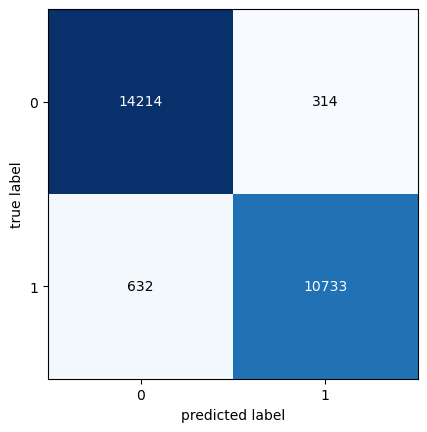

In [118]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(confusion_matrix(y_test_mlextend, y_hat))

## Desafio

Ao longo deste curso aplicamos diversas técnicas de combinação de modelos. Agora, que tal se aventurar em um outro problema de classificação?

Nesse Mão na massa quero que você faça a classificação de clientes de um banco. O nosso alvo de classificação é a coluna y do [dataset](https://raw.githubusercontent.com/alura-cursos/combina-classificadores/main/dados/bank_additional_full_processed.csv). Essa coluna indica se o cliente do banco fez ou não o depósito em uma conta após ser submetido a uma campanha de marketing.

Quero que você combine diferentes tipos de modelo usando o [`StackingCVClassifier`](https://rasbt.github.io/mlxtend/user_guide/classifier/StackingCVClassifier/) para gerar uma previsão interessante. Ao final do processo verifique o `score` do resultado comparando a sua previsão com os dados de teste.

### Importação e EDA

In [17]:
CSV_DESAFIO_URL = 'https://raw.githubusercontent.com/alura-cursos/combina-classificadores/main/dados/bank_additional_full_processed.csv'

import pandas as pd

SEED = 7

df_desafio = pd.read_csv(CSV_DESAFIO_URL)

df_desafio.head()

age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  month_may  month_nov  \
0          -36.4      4.857       5191.0  ...          1          0   
1          -36.4      4.857       5191.0  ...          1          0   
2          -36.4      4.857       5191.0  ...          1          0   
3          -36.4      4.857       5191.0  ...          1          0   
4          -36.4      4.857       5191.0  ...          1          0   

   month_oct  month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0          0          0                1                0                0   
1          0          0                1                0                0   
2          0          0                1                0                0   
3          0          0                1                0                0   
4          0          0                1                0                0   

   day_of_week_wed  poutcome_nonexistent  poutcome_success  
0                0                     1                 0  
1                0                     1                 0  
2                0                     1                 0  
3                0                     1                 0  
4                0                     1                 0  

[5 rows x 54 columns]

In [4]:
df_desafio.info()
df_desafio.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_blue-collar                41188 non-null  int64  
 12  job_entrepreneur               41188 non-null 

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m  \
count  41188.000000    41188.000000   41188.000000  41188.000000   
mean       0.081886       93.575664     -40.502600      3.621291   
std        1.570960        0.578840       4.628198      1.734447   
min       -3.400000       92.201000     -50.800000      0.634000   
25%       -1.800000       93.075000     -42.700000      1.344000   
50%        1.100000       93.749000     -41.800000      4.857000   
75%        1.400000       93.994000     -36.400000      4.961000   
max        1.400000       94.767000     -26.900000      5.045000   

        nr.employed  ...     month_may     month_nov     month_oct  \
count  41188.000000  ...  41188.000000  41188.000000  41188.000000   
mean    5167.035911  ...      0.334296      0.099568      0.017432   
std       72.251528  ...      0.471750      0.299427      0.130877   
min     4963.600000  ...      0.000000      0.000000      0.000000   
25%     5099.100000  ...      0.000000      0.000000      0.000000   
50%     5191.000000  ...      0.000000      0.000000      0.000000   
75%     5228.100000  ...      1.000000      0.000000      0.000000   
max     5228.100000  ...      1.000000      1.000000      1.000000   

          month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
count  41188.000000     41188.000000     41188.000000     41188.000000   
mean       0.013839         0.206711         0.209357         0.196416   
std        0.116824         0.404951         0.406855         0.397292   
min        0.000000         0.000000         0.000000         0.000000   
25%        0.000000         0.000000         0.000000         0.000000   
50%        0.000000         0.000000         0.000000         0.000000   
75%        0.000000         0.000000         0.000000         0.000000   
max        1.000000         1.000000         1.000000         1.000000   

       day_of_week_wed  poutcome_nonexistent  poutcome_success  
count     41188.000000          41188.000000      41188.000000  
mean          0.197485              0.863431          0.033335  
std           0.398106              0.343396          0.179512  
min           0.000000              0.000000          0.000000  
25%           0.000000              1.000000          0.000000  
50%           0.000000              1.000000          0.000000  
75%           0.000000              1.000000          0.000000  
max           1.000000              1.000000          1.000000  

[8 rows x 54 columns]

In [5]:
df_desafio.isna().sum().sum()

0

In [8]:
df_desafio['y'].value_counts(normalize=True) * 100

y
0    88.734583
1    11.265417
Name: proportion, dtype: float64

### Treinamento de modelos básicos

In [11]:
! pip install imblearn catboost xgboost mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.4 MB/s eta 0:00:00a 0:00:01


In [18]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline as PipelineImb

models = [
    (RandomForestClassifier, {'random_state': SEED}),
    (AdaBoostClassifier, {'random_state': SEED}),
    (CatBoostClassifier, {'random_seed': SEED}),
    (XGBClassifier, {'seed': SEED})
]

pipelines = []

for Model, params in models:
    pipelines.append(
        PipelineImb([
            (StandardScaler.__name__, StandardScaler()),
            (RandomUnderSampler.__name__, RandomUnderSampler()),
            (Model.__name__, Model(**params))
        ])
    )

pipelines 


[Pipeline(steps=[('StandardScaler', StandardScaler()),
                 ('RandomUnderSampler', RandomUnderSampler()),
                 ('RandomForestClassifier',
                  RandomForestClassifier(random_state=7))]),
 Pipeline(steps=[('StandardScaler', StandardScaler()),
                 ('RandomUnderSampler', RandomUnderSampler()),
                 ('AdaBoostClassifier', AdaBoostClassifier(random_state=7))]),
 Pipeline(steps=[('StandardScaler', StandardScaler()),
                 ('RandomUnderSampler', RandomUnderSampler()),
                 ('CatBoostClassifier',
                  <catboost.core.CatBoostClassifier object at 0x7f6545cd18d0>)]),
 Pipeline(steps=[('StandardScaler', StandardScaler()),
                 ('RandomUnderSampler', RandomUnderSampler()),
                 ('XGBClassifier',
                  XGBClassifier(base_score=None, booster=None, callbacks=None,
                                colsample_bylevel=None, colsample_bynode=None,
                             

In [19]:
from sklearn.model_selection import train_test_split

X, y = df_desafio.drop('y', axis=1), df_desafio['y']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [28]:
from sklearn.metrics import accuracy_score

accuracy_scores = {}

for (Model, _), pipeline in zip(models, pipelines):
    pipeline.fit(X_train, y_train)

    accuracy_scores[Model.__name__] = accuracy_score(y_test, 
                                                     pipeline.predict(X_test))

accuracy_scores

Learning rate set to 0.023395
0:	learn: 0.6717771	total: 51.3ms	remaining: 51.2s
1:	learn: 0.6522524	total: 54.6ms	remaining: 27.3s
2:	learn: 0.6339601	total: 57.9ms	remaining: 19.2s
3:	learn: 0.6153818	total: 61.2ms	remaining: 15.2s
4:	learn: 0.5981312	total: 64.4ms	remaining: 12.8s
5:	learn: 0.5842490	total: 67.7ms	remaining: 11.2s
6:	learn: 0.5699903	total: 71.1ms	remaining: 10.1s
7:	learn: 0.5561580	total: 74.8ms	remaining: 9.27s
8:	learn: 0.5451796	total: 78.4ms	remaining: 8.63s
9:	learn: 0.5321721	total: 82.4ms	remaining: 8.15s
10:	learn: 0.5189467	total: 85.9ms	remaining: 7.73s
11:	learn: 0.5080340	total: 89.6ms	remaining: 7.38s
12:	learn: 0.4964336	total: 93.2ms	remaining: 7.07s
13:	learn: 0.4859668	total: 96.8ms	remaining: 6.82s
14:	learn: 0.4746278	total: 100ms	remaining: 6.56s
15:	learn: 0.4658986	total: 102ms	remaining: 6.29s
16:	learn: 0.4570957	total: 106ms	remaining: 6.13s
17:	learn: 0.4481699	total: 109ms	remaining: 5.96s
18:	learn: 0.4416750	total: 112ms	remaining: 5.7

{'RandomForestClassifier': 0.8538409245411285,
 'AdaBoostClassifier': 0.8630669126930174,
 'CatBoostClassifier': 0.8636496066815578,
 'XGBClassifier': 0.8609303680683694}

### Hyperparameter tuning

In [53]:
param_grids = {
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': list(range(2, 11, 2)),
        'min_samples_split': [2, 3]
    },
    'AdaBoostClassifier': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [10 ** -i for i in range(1, 4)]
    },
    'CatBoostClassifier': {
        'iterations': [100, 200, 300],
        'depth': [2, 4, 6, 8],
        'learning_rate': [10 ** -i for i in range(1, 4)]
    },
    'XGBClassifier': {
        'learning_rate': [.1, .2, .3],
        'max_depth': [2, 4, 6, 8, 10, 15, 20],
        'colsample_bytree': [.1, .5, .1],
        'n_estimators': [10, 25, 50, 100]
    }
}

#### Com pipeline (RandomUnderSampling e StandardScaler)

In [54]:
from sklearn.model_selection import GridSearchCV

pipelines_grid_cv_scores = {}

for (Model, _), pipeline in zip(models, pipelines):
    model_grid_cv = GridSearchCV(estimator=pipeline,
                                 param_grid={f'{Model.__name__}__{key}': value for key, value in param_grids[Model.__name__].items()},
                                 cv=5,
                                 scoring='accuracy',
                                 verbose=1)

    model_grid_cv.fit(X_train, y_train)

    pipelines_grid_cv_scores[Model.__name__] = {
        'best_params': model_grid_cv.best_params_,
        'best_score': model_grid_cv.best_score_,
    }

pipelines_grid_cv_scores

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
0:	learn: 0.6362010	total: 635us	remaining: 62.9ms
1:	learn: 0.5938672	total: 1.18ms	remaining: 58ms
2:	learn: 0.5496937	total: 1.65ms	remaining: 53.3ms
3:	learn: 0.5188587	total: 2.16ms	remaining: 51.8ms
4:	learn: 0.4911436	total: 2.66ms	remaining: 50.5ms
5:	learn: 0.4746200	total: 3.14ms	remaining: 49.1ms
6:	learn: 0.4577799	total: 3.63ms	remaining: 48.2ms
7:	learn: 0.4469022	total: 4.14ms	remaining: 47.6ms
8:	learn: 0.4316999	total: 4.61ms	remaining: 46.6ms
9:	learn: 0.4214235	total: 5.13ms	remaining: 46.1ms
10:	learn: 0.4141294	total: 5.63ms	remaining: 45.5ms
11:	learn: 0.4049536	total: 6.12ms	remaining: 44.9ms
12:	learn: 0.3937306	total: 6.66ms	remaining: 44.6ms
13:	learn: 0.3890409	total: 7.12ms	remaining: 43.7ms
14:	learn: 0.3838134	total: 7.65ms	remaining: 43.3ms
15:	learn: 0.3787068	total: 8.22ms

{'RandomForestClassifier': {'best_params': {'RandomForestClassifier__max_depth': 10,
   'RandomForestClassifier__min_samples_split': 2,
   'RandomForestClassifier__n_estimators': 50},
  'best_score': 0.8459747667134124},
 'AdaBoostClassifier': {'best_params': {'AdaBoostClassifier__learning_rate': 0.1,
   'AdaBoostClassifier__n_estimators': 200},
  'best_score': 0.8650738403151351},
 'CatBoostClassifier': {'best_params': {'CatBoostClassifier__depth': 4,
   'CatBoostClassifier__iterations': 300,
   'CatBoostClassifier__learning_rate': 0.1},
  'best_score': 0.8620958602511845},
 'XGBClassifier': {'best_params': {'XGBClassifier__colsample_bytree': 0.1,
   'XGBClassifier__learning_rate': 0.2,
   'XGBClassifier__max_depth': 6,
   'XGBClassifier__n_estimators': 100},
  'best_score': 0.8595707817039837}}

#### Sem pipeline

In [55]:
from sklearn.model_selection import GridSearchCV

nopipelines_grid_cv_scores = {}

for Model, seedParam in models:
    model_grid_cv = GridSearchCV(estimator=Model(**seedParam),
                                 param_grid=param_grids[Model.__name__],
                                 cv=5,
                                 scoring='accuracy',
                                 verbose=1)

    model_grid_cv.fit(X_train, y_train)

    nopipelines_grid_cv_scores[Model.__name__] = {
        'best_params': model_grid_cv.best_params_,
        'best_score': model_grid_cv.best_score_,
    }

nopipelines_grid_cv_scores

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
0:	learn: 0.5990509	total: 1.25ms	remaining: 124ms
1:	learn: 0.5066933	total: 2.51ms	remaining: 123ms
2:	learn: 0.4446869	total: 3.79ms	remaining: 123ms
3:	learn: 0.3890150	total: 5.01ms	remaining: 120ms
4:	learn: 0.3546569	total: 6.39ms	remaining: 121ms
5:	learn: 0.3109543	total: 7.65ms	remaining: 120ms
6:	learn: 0.2947865	total: 9.02ms	remaining: 120ms
7:	learn: 0.2834636	total: 10.3ms	remaining: 118ms
8:	learn: 0.2662578	total: 11.6ms	remaining: 117ms
9:	learn: 0.2578353	total: 12.9ms	remaining: 116ms
10:	learn: 0.2487612	total: 14.3ms	remaining: 115ms
11:	learn: 0.2447605	total: 15.5ms	remaining: 114ms
12:	learn: 0.2375803	total: 16.8ms	remaining: 113ms
13:	learn: 0.2340073	total: 18.2ms	remaining: 112ms
14:	learn: 0.2258557	total: 19.4ms	remaining: 110ms
15:	learn: 0.2217893	total: 20.7ms	remaining: 

{'RandomForestClassifier': {'best_params': {'max_depth': 10,
   'min_samples_split': 3,
   'n_estimators': 100},
  'best_score': 0.9126282638104575},
 'AdaBoostClassifier': {'best_params': {'learning_rate': 0.1,
   'n_estimators': 200},
  'best_score': 0.9088407298166479},
 'CatBoostClassifier': {'best_params': {'depth': 4,
   'iterations': 200,
   'learning_rate': 0.1},
  'best_score': 0.9179049685881926},
 'XGBClassifier': {'best_params': {'colsample_bytree': 0.5,
   'learning_rate': 0.2,
   'max_depth': 4,
   'n_estimators': 100},
  'best_score': 0.9172574469934428}}

### Usando StackingCVClassifier para criação do modelo final

#### Com pipeline

In [60]:
pipelines = []

for Model, params in models:
    pipelines.append(
        PipelineImb([
            (StandardScaler.__name__, StandardScaler()),
            (RandomUnderSampler.__name__, RandomUnderSampler()),
            (Model.__name__, Model(**params, 
                                   **{f'{key.split("__")[-1]}': value for key, value in pipelines_grid_cv_scores[Model.__name__]['best_params'].items()}))
        ])
    )

pipelines 

[Pipeline(steps=[('StandardScaler', StandardScaler()),
                 ('RandomUnderSampler', RandomUnderSampler()),
                 ('RandomForestClassifier',
                  RandomForestClassifier(max_depth=10, n_estimators=50,
                                         random_state=7))]),
 Pipeline(steps=[('StandardScaler', StandardScaler()),
                 ('RandomUnderSampler', RandomUnderSampler()),
                 ('AdaBoostClassifier',
                  AdaBoostClassifier(learning_rate=0.1, n_estimators=200,
                                     random_state=7))]),
 Pipeline(steps=[('StandardScaler', StandardScaler()),
                 ('RandomUnderSampler', RandomUnderSampler()),
                 ('CatBoostClassifier',
                  <catboost.core.CatBoostClassifier object at 0x7f65141242d0>)]),
 Pipeline(steps=[('StandardScaler', StandardScaler()),
                 ('RandomUnderSampler', RandomUnderSampler()),
                 ('XGBClassifier',
                  XGBCl

In [61]:
from mlxtend.classifier import StackingCVClassifier

model_stack_cv_pipeline = StackingCVClassifier(classifiers=pipelines,
                                               meta_classifier=LogisticRegression(random_state=SEED),
                                               cv=5)

model_stack_cv_pipeline.fit(X_train, y_train)

y_hat = model_stack_cv_pipeline.predict(X_test)

for metric in ['error', 'precision', 'recall', 'f1']:
    print(f'Métrica {metric}:',
          scoring(y_test, y_hat, metric))

0:	learn: 0.6199005	total: 744us	remaining: 223ms
1:	learn: 0.5700680	total: 1.53ms	remaining: 228ms
2:	learn: 0.5170315	total: 2.2ms	remaining: 218ms
3:	learn: 0.4778965	total: 2.85ms	remaining: 211ms
4:	learn: 0.4433617	total: 3.48ms	remaining: 205ms
5:	learn: 0.4234041	total: 4.15ms	remaining: 203ms
6:	learn: 0.4079050	total: 4.78ms	remaining: 200ms
7:	learn: 0.3936966	total: 5.49ms	remaining: 200ms
8:	learn: 0.3769137	total: 6.16ms	remaining: 199ms
9:	learn: 0.3646672	total: 6.83ms	remaining: 198ms
10:	learn: 0.3577137	total: 7.53ms	remaining: 198ms
11:	learn: 0.3461983	total: 8.2ms	remaining: 197ms
12:	learn: 0.3402705	total: 8.89ms	remaining: 196ms
13:	learn: 0.3319923	total: 9.57ms	remaining: 196ms
14:	learn: 0.3274915	total: 10.3ms	remaining: 195ms
15:	learn: 0.3246140	total: 10.9ms	remaining: 194ms
16:	learn: 0.3217805	total: 11.6ms	remaining: 193ms
17:	learn: 0.3191716	total: 12.3ms	remaining: 193ms
18:	learn: 0.3159006	total: 13ms	remaining: 192ms
19:	learn: 0.3124234	total:

/opt/conda/lib/python3.11/site-packages/mlxtend/evaluate/scoring.py:153: RuntimeWarning: invalid value encountered in divide
  res = float(tp) / (tp + fp)
/opt/conda/lib/python3.11/site-packages/mlxtend/evaluate/scoring.py:155: RuntimeWarning: invalid value encountered in divide
  pre = float(tp) / (tp + fp)


#### Sem pipeline

In [62]:
from mlxtend.classifier import StackingCVClassifier

model_stack_cv_nopipeline = StackingCVClassifier(classifiers=[Model(**params, **nopipelines_grid_cv_scores[Model.__name__]['best_params']) for Model, params in models],
                                                 meta_classifier=LogisticRegression(random_state=SEED),
                                                 cv=5)

model_stack_cv_nopipeline.fit(X_train, y_train)

y_hat = model_stack_cv_nopipeline.predict(X_test)

for metric in ['error', 'precision', 'recall', 'f1']:
    print(f'Métrica {metric}:',
          scoring(y_test, y_hat, metric))

0:	learn: 0.5681340	total: 1.49ms	remaining: 296ms
1:	learn: 0.4684168	total: 2.94ms	remaining: 291ms
2:	learn: 0.3982662	total: 4.28ms	remaining: 281ms
3:	learn: 0.3472541	total: 5.69ms	remaining: 279ms
4:	learn: 0.3116573	total: 7.07ms	remaining: 276ms
5:	learn: 0.2872490	total: 8.51ms	remaining: 275ms
6:	learn: 0.2689996	total: 9.91ms	remaining: 273ms
7:	learn: 0.2547937	total: 11.3ms	remaining: 271ms
8:	learn: 0.2468572	total: 12.7ms	remaining: 270ms
9:	learn: 0.2357999	total: 14.2ms	remaining: 269ms
10:	learn: 0.2284143	total: 15.6ms	remaining: 268ms
11:	learn: 0.2214363	total: 17ms	remaining: 267ms
12:	learn: 0.2157543	total: 18.6ms	remaining: 267ms
13:	learn: 0.2114482	total: 20ms	remaining: 265ms
14:	learn: 0.2076406	total: 21.3ms	remaining: 263ms
15:	learn: 0.2062184	total: 22.7ms	remaining: 261ms
16:	learn: 0.2039923	total: 24.1ms	remaining: 260ms
17:	learn: 0.2021321	total: 25.5ms	remaining: 258ms
18:	learn: 0.1970704	total: 27ms	remaining: 257ms
19:	learn: 0.1944293	total: 